In [2]:
# Python libraries

import pandas as pd
import numpy as np
import copy

# Pour voir les graphiques sous les cellules

%matplotlib inline

In [4]:
# Panda dataframe

url = 'https://raw.githubusercontent.com/ismayc/pnwflights14/master/data/flights.csv'

df_flights = pd.read_csv( url )

In [5]:
# head records 

df_flights.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2014,1,1,1.0,96.0,235.0,70.0,AS,N508AS,145,PDX,ANC,194.0,1542,0.0,1.0
1,2014,1,1,4.0,-6.0,738.0,-23.0,US,N195UW,1830,SEA,CLT,252.0,2279,0.0,4.0
2,2014,1,1,8.0,13.0,548.0,-4.0,UA,N37422,1609,PDX,IAH,201.0,1825,0.0,8.0
3,2014,1,1,28.0,-2.0,800.0,-23.0,US,N547UW,466,PDX,CLT,251.0,2282,0.0,28.0
4,2014,1,1,34.0,44.0,325.0,43.0,AS,N762AS,121,SEA,ANC,201.0,1448,0.0,34.0


In [6]:
# numbers of rows , columns

df_flights.shape

(162049, 16)

In [7]:
# Informations about columns in dataframe

print( df_flights.info() )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162049 entries, 0 to 162048
Data columns (total 16 columns):
year         162049 non-null int64
month        162049 non-null int64
day          162049 non-null int64
dep_time     161192 non-null float64
dep_delay    161192 non-null float64
arr_time     161061 non-null float64
arr_delay    160748 non-null float64
carrier      162049 non-null object
tailnum      161801 non-null object
flight       162049 non-null int64
origin       162049 non-null object
dest         162049 non-null object
air_time     160748 non-null float64
distance     162049 non-null int64
hour         161192 non-null float64
minute       161192 non-null float64
dtypes: float64(7), int64(5), object(4)
memory usage: 19.8+ MB
None


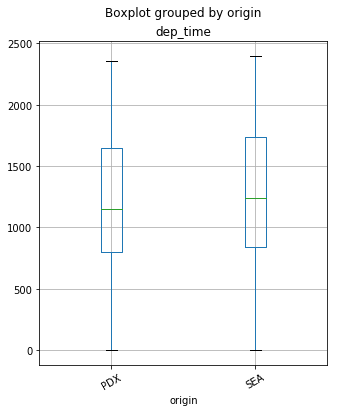

In [8]:
# Boxplot 


# Departure time by origin ( airport )

df_flights.boxplot('dep_time' , 'origin' , rot = 30 , figsize=(5,6) )

In [11]:
# categorical features in new dataframe 
# object dtype => categorical features ( see also category dtype )

cat_df_flights = df_flights.select_dtypes(include = ['object'] ).copy()

print( cat_df_flights.info() )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162049 entries, 0 to 162048
Data columns (total 4 columns):
carrier    162049 non-null object
tailnum    161801 non-null object
origin     162049 non-null object
dest       162049 non-null object
dtypes: object(4)
memory usage: 4.9+ MB
None


In [12]:
cat_df_flights.shape

(162049, 4)

In [10]:
cat_df_flights.head()

,carrier,tailnum,origin,dest
0,AS,N508AS,PDX,ANC
1,US,N195UW,SEA,CLT
2,UA,N37422,PDX,IAH
3,US,N547UW,PDX,CLT
4,AS,N762AS,SEA,ANC


In [13]:
# Checking for null values in dataset

print( cat_df_flights.isnull().values.sum() )

248


In [14]:
# null values by columns 

print( cat_df_flights.isnull().sum() )

# only tailnum column has null values.


carrier      0
tailnum    248
origin       0
dest         0
dtype: int64


In [15]:
# Frequency distribution : value_count()

frq_dsb_carrier = cat_df_flights['carrier'].value_counts( dropna = False )

print( frq_dsb_carrier )

AS    62460
WN    23355
OO    18710
DL    16716
UA    16671
AA     7586
US     5946
B6     3540
VX     3272
F9     2698
HA     1095
Name: carrier, dtype: int64


In [16]:
# Enregistrements de cat_df_flights par origin * carrier :

cat_df_flights.groupby(['origin','carrier']).count()

tailnum   dest
origin carrier                
PDX    AA          2187   2187
       AS         12844  12844
       B6          1287   1287
       DL          5168   5168
       F9          1357   1362
       HA           365    365
       OO          9841   9841
       UA          6009   6061
       US          2337   2361
       VX           666    666
       WN         11190  11193
SEA    AA          5398   5399
       AS         49616  49616
       B6          2253   2253
       DL         11548  11548
       F9          1332   1336
       HA           729    730
       OO          8869   8869
       UA         10487  10610
       US          3554   3585
       VX          2606   2606
       WN         12158  12162

In [19]:
# count of distinct categories within categorical feature : value_counts().count()

print( cat_df_flights['carrier'].value_counts( dropna = False ).count() )

11


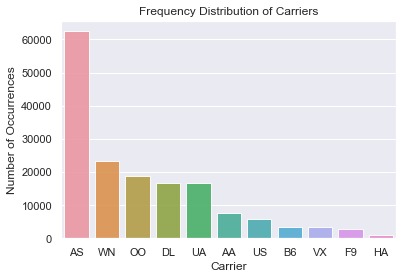

In [20]:
# Barplot of the frequency distribution of a categorical feature 

import seaborn as sns

import matplotlib.pyplot as plt

frq_dsb_carrier = cat_df_flights['carrier'].value_counts( dropna = False )

# Barplot

sns.set(style="darkgrid")


#frq_dsb.carrier.index : modalités
#frq_dsb_carrier.values : effectifs
sns.barplot( frq_dsb_carrier.index , frq_dsb_carrier.values , alpha = 0.9 )

plt.title( 'Frequency Distribution of Carriers' )
plt.ylabel( 'Number of Occurrences', fontsize = 12 )
plt.xlabel( 'Carrier', fontsize = 12)

plt.show()


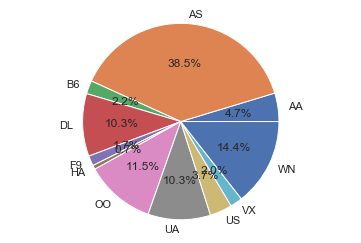

In [26]:
# Pie chart

labels = cat_df_flights['carrier'].astype('category').cat.categories.tolist()

counts = cat_df_flights['carrier'].value_counts( dropna = False )

sizes = [ counts[var_cat] for var_cat in labels]

fig1, ax1 = plt.subplots()
ax1.pie( sizes , labels = labels , autopct = '%1.1f%%' , shadow = False ) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [29]:
labels

['AA', 'AS', 'B6', 'DL', 'F9', 'HA', 'OO', 'UA', 'US', 'VX', 'WN']

In [33]:
# ENCODING CATEGORICAL DATA :
# 
# Replacing values
# Encoding labels ( !!! poids arbitraire des catégories )
# One-Hot encoding ( !!! curse of dimensionality )
# Binary encoding
# Backward difference encoding
# Miscellaneous features

In [ ]:
# ENCODING CATEGORICAL DATA - Replacing values : pandas function replace()

In [46]:
# Dictionary 

# A la main ( peu de catégories ) :
# replace_map = {'carrier': {'AA': 1, 'AS': 2, 'B6': 3, 'DL': 4, 'F9': 5, 'HA': 6, 'OO': 7 , 'UA': 8 , 'US': 9,'VX': 10,'WN': 11} }

labels = cat_df_flights['carrier'].astype('category').cat.categories.tolist()

# bcp de catégories
# zip accole labels et range(1,12)

replace_map_comp = { 'carrier' : { k : v for k , v in zip( labels , list( range( 1 , len( labels ) + 1 ) ) ) } }

print( replace_map_comp )


{'carrier': {'AA': 1, 'AS': 2, 'B6': 3, 'DL': 4, 'F9': 5, 'HA': 6, 'OO': 7, 'UA': 8, 'US': 9, 'VX': 10, 'WN': 11}}


In [47]:
cat_df_flights_replace = cat_df_flights.copy()

# Remplacement de carrier à partir de replace_map_comp 

cat_df_flights_replace.replace(replace_map_comp, inplace=True)

cat_df_flights_replace.head()

,carrier,tailnum,origin,dest
0,2,N508AS,PDX,ANC
1,9,N195UW,SEA,CLT
2,8,N37422,PDX,IAH
3,9,N547UW,PDX,CLT
4,2,N762AS,SEA,ANC


In [48]:
print(cat_df_flights_replace['carrier'].dtypes)

int64


In [61]:
#Tip: in Python, it's a good practice to typecast categorical features to a category dtype 
#because they make the operations on such columns much faster than the object dtype. 
#You can do the typecasting by using .astype() method on your columns like shown below:

# ENCODING CATEGORICAL DATA - Replacing values : pandas function replace() = cat_df_flights.copy()

cat_df_flights_lc['carrier'] = cat_df_flights_lc['carrier'].astype('category')
cat_df_flights_lc['origin'] = cat_df_flights_lc['origin'].astype('category')                                                              

print(cat_df_flights_lc.dtypes)

carrier    category
tailnum      object
origin     category
dest         object
dtype: object


In [ ]:
# ENCODING CATEGORICAL DATA - Encoding labels 

In [56]:
# Variable US_code : si carrier contient US alors 1 sinon 0 ( np.where )

cat_df_flights_specific = cat_df_flights.copy()

cat_df_flights_specific['US_code'] = np.where(cat_df_flights_specific['carrier'].str.contains('US'), 1, 0)

cat_df_flights_specific.head()

,carrier,tailnum,origin,dest,US_code
0,AS,N508AS,PDX,ANC,0
1,US,N195UW,SEA,CLT,1
2,UA,N37422,PDX,IAH,0
3,US,N547UW,PDX,CLT,1
4,AS,N762AS,SEA,ANC,0


In [62]:
# remplacer carrier par rang dans classement alphabétique

cat_df_flights_lc['carrier'] = cat_df_flights_lc['carrier'].cat.codes

cat_df_flights_lc.head()

,carrier,tailnum,origin,dest
0,1,N508AS,PDX,ANC
1,8,N195UW,SEA,CLT
2,7,N37422,PDX,IAH
3,8,N547UW,PDX,CLT
4,1,N762AS,SEA,ANC


In [64]:
# label encoding with scikit-learn : LabelEncoder()

from sklearn.preprocessing import LabelEncoder

cat_df_flights_sklearn = cat_df_flights.copy()


lb_make = LabelEncoder()

cat_df_flights_sklearn['carrier_code'] = lb_make.fit_transform(cat_df_flights['carrier'])

cat_df_flights_sklearn.head()


,carrier,tailnum,origin,dest,carrier_code
0,AS,N508AS,PDX,ANC,1
1,US,N195UW,SEA,CLT,8
2,UA,N37422,PDX,IAH,7
3,US,N547UW,PDX,CLT,8
4,AS,N762AS,SEA,ANC,1


In [ ]:
# ENCODING CATEGORICAL DATA - # One-Hot encoding ( pandas getdummies() method )

In [65]:
cat_df_flights_onehot = cat_df_flights.copy()

cat_df_flights_onehot = pd.get_dummies(cat_df_flights_onehot, columns=['carrier'], prefix = ['carrier'])

cat_df_flights_onehot.head()

,tailnum,origin,dest,carrier_AA,carrier_AS,carrier_B6,carrier_DL,carrier_F9,carrier_HA,carrier_OO,carrier_UA,carrier_US,carrier_VX,carrier_WN
0,N508AS,PDX,ANC,0,1,0,0,0,0,0,0,0,0,0
1,N195UW,SEA,CLT,0,0,0,0,0,0,0,0,1,0,0
2,N37422,PDX,IAH,0,0,0,0,0,0,0,1,0,0,0
3,N547UW,PDX,CLT,0,0,0,0,0,0,0,0,1,0,0
4,N762AS,SEA,ANC,0,1,0,0,0,0,0,0,0,0,0


In [67]:
# One-hot encoding with scikit-learn : LabelBinarizer()

from sklearn.preprocessing import LabelBinarizer

cat_df_flights_onehot_sklearn = cat_df_flights.copy()


lb = LabelBinarizer()
lb_results = lb.fit_transform( cat_df_flights_onehot_sklearn['carrier'] )
lb_results_df = pd.DataFrame( lb_results , columns = lb.classes_ )

print(lb_results_df.head())

   AA  AS  B6  DL  F9  HA  OO  UA  US  VX  WN
0   0   1   0   0   0   0   0   0   0   0   0
1   0   0   0   0   0   0   0   0   1   0   0
2   0   0   0   0   0   0   0   1   0   0   0
3   0   0   0   0   0   0   0   0   1   0   0
4   0   1   0   0   0   0   0   0   0   0   0


In [68]:
# concatenation du one-hot encoding de carrier avec cat_df_flights_onehot_sklearn

result_df = pd.concat( [ cat_df_flights_onehot_sklearn , lb_results_df ] , axis = 1 )

print(result_df.head())

  carrier tailnum origin dest  AA  AS  B6  DL  F9  HA  OO  UA  US  VX  WN
0      AS  N508AS    PDX  ANC   0   1   0   0   0   0   0   0   0   0   0
1      US  N195UW    SEA  CLT   0   0   0   0   0   0   0   0   1   0   0
2      UA  N37422    PDX  IAH   0   0   0   0   0   0   0   1   0   0   0
3      US  N547UW    PDX  CLT   0   0   0   0   0   0   0   0   1   0   0
4      AS  N762AS    SEA  ANC   0   1   0   0   0   0   0   0   0   0   0


In [ ]:
# ENCODING CATEGORICAL DATA - Binary encoding ( module category_encoder )

In [ ]:
# categories encoded as ordinal ( integer ) > binary converted > binary digits splitted into columns

In [ ]:
import sys

#!conda install --yes --prefix {sys.prefix} category_encoders

!conda install -c conda-forge category_encoders 

In [ ]:
import category_encoders as ce

In [ ]:
cat_df_flights_ce = cat_df_flights.copy()

df_binary = encoder.fit_transform(cat_df_flights_ce)

df_binary.head()